# Systems of linear equations

Systems of linear equations appear in multitude of applications and solving them efficiently is important.
Generally a system of $N$ linear equations corresponds to the following construction
\begin{align}
\sum_{j=1}^N a_{1j} x_j & = v_1,\\
\ldots \\
\sum_{j=1}^N a_{Nj} x_j & = v_N.
\end{align}
which can be writtren in a matrix form
$$
\mathbf{A} \mathbf{x} = \mathbf{v}.
$$
where
$$
\mathbf{A} = \left(\begin{array}{ccc} 
a_{11} & \ldots & a_{1N} \\
\ldots& \ldots & \ldots\\
a_{N1} & \ldots & a_{NN} \\
\end{array}\right)
$$ 

A unique solution to the system of equations exists if they are all linearly independent.
Alternatively, this is the case if the determinant of matrix $\mathbf{A}$ is non-zero, $\det \mathbf{A} \neq 0$.

There are many efficient libraries that exist to solve systems of linear equations efficiently, and these should be used. Nevertheless, going over the basic methods for solving linear equations is important to understand the concepts, limitations, and possible issues and solutions to them.

## Gaussian elimination and backsubstition

Gaussian elimination is the most basic approach of solving systems of linear equations.
It is based on the fact that the following two operations leave the system of equations equivalent.
1. One can multiply any equation by a constant (non-zero) factor, and it will still be the same system of equations with the same solution.
2. One can take any linear combination of two (or more) equations to get another correct equation. This new equation can replace any of the equations entering this linear combinations. In other words, we can subtract from any of the equations any other equation, and the resuling system of linear equation will stay equivalent to what we had before.

### Gaussian elimination

Gaussian elimination proceeds from successively tranforming the system of equations into a simpler and simpler from by elimimating all entries below the main diagonal. Let us take a system of 4 equations as an example
$$
\left(\begin{array}{cccc} 
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1 \\
v_2 \\
v_3 \\
v_4
\end{array}\right)
$$


1. We start from the first row. We divide the row by $a_{11}$ such that its diagonal element is equal to unity
$$
\left(\begin{array}{cccc} 
1 & a_{12}/a_{11} & a_{13}/a_{11} & a_{14}/a_{11} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1/a_{11} \\
v_2 \\
v_3 \\
v_4
\end{array}\right)
$$

2. Then, we make all entries in the first column below the main diagonal to go to zero. To achieve that we subtract the first equation multiplied by $a_{j2}$ from the $j$th equation:
$$
\left(\begin{array}{cccc} 
1 & a_{12}/a_{11} & a_{13}/a_{11} & a_{14}/a_{11} \\
0 & a_{22} - a_{21} a_{12}/a_{11} & a_{23} - a_{21} a_{13}/a_{11} & a_{24} - a_{21} a_{14}/a_{11} \\
0 & a_{32} - a_{31} a_{12}/a_{11} & a_{33} - a_{31} a_{13}/a_{11} & a_{34} - a_{31} a_{14}/a_{11} \\
0 & a_{42} - a_{41} a_{12}/a_{11} & a_{43} - a_{41} a_{13}/a_{11} & a_{44} - a_{41} a_{14}/a_{11}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1/a_{11} \\
v_2 - a_{21} v_1/a_{11} \\
v_3 - a_{31} v_1/a_{11}\\
v_4 - a_{41} v_1/a_{11}
\end{array}\right)
$$
which we can denote as
$$
\left(\begin{array}{cccc} 
1 &  a_{12}^{'} & a_{13}^{'} & a_{14}^{'} \\
0 & a_{22}^{'} & a_{23}^{'} & a_{24}^{'} \\
0 & a_{32}^{'} & a_{33}^{'} & a_{34}^{'} \\
0 & a_{42}^{'} & a_{43}^{'} & a_{44}^{'}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1^{'} \\
v_2^{'} \\
v_3^{'} \\
v_4^{'}
\end{array}\right)
$$

3. Repeat steps 1-2 to make all elements below the main diagonal in the 2nd column go to zero
$$
\left(\begin{array}{cccc} 
1 &  a_{12}^{''} & a_{13}^{''} & a_{14}^{''} \\
0 & 1 & a_{23}^{''} & a_{24}^{''} \\
0 & 0 & a_{33}^{''} & a_{34}^{''} \\
0 & 0 & a_{43}^{''} & a_{44}^{''}
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
v_1^{''} \\
v_2^{''} \\
v_3^{''} \\
v_4^{''}
\end{array}\right)
$$

4. Repeat until all elements below the main diagonal are zero and all diagonal elements are equal to unity
$$
\left(\begin{array}{cccc} 
1 &  \tilde a_{12} & \tilde a_{13} & \tilde a_{14} \\
0 & 1 & \tilde a_{23} & \tilde a_{24} \\
0 & 0 & 1 & \tilde a_{34} \\
0 & 0 & 0 & 1
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
\tilde v_1 \\
\tilde v_2 \\
\tilde v_3 \\
\tilde v_4
\end{array}\right)
$$

*Example:* System of equations 
$$
\left(\begin{array}{cccc} 
2 & 1 & 4 & 1 \\
3 & 4 & -1 & -1 \\
1 & -4 & 1 & 5 \\
2 & -2 & 1 & 3
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
-4 \\
3 \\
9 \\
7
\end{array}\right)
$$
becomes
$$
\left(\begin{array}{cccc} 
1 & 0.5 & 2 & 0.5 \\
0 & 1 & -2.8 & -1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
-2 \\
3.6 \\
-2 \\
1
\end{array}\right)
$$

## Backsubstitution

In the end we have the following system of equations
\begin{align}
x_1 + \tilde a_{12} x_2 + \tilde a_{13} x_3 + \tilde a_{14} x_4 & = \tilde v_1, \\
x_2 + \tilde a_{23} x_3 + \tilde a_{24} x_4 & = \tilde v_2, \\
x_3 + \tilde a_{34} x_4 & = \tilde v_3, \\
x_4 & = \tilde v_4.
\end{align}

The solution now is trivial and proceeds through backsubstition, starting from 
$$
x_4 = \tilde v_4
$$
to
$$
x_3 = \tilde v_3 - \tilde a_{34} x_4
$$
to
$$
x_2 = \tilde v_4 - \tilde a_{23} x_3 - \tilde a_{24} x_4
$$
and finally to
$$
x_1 = \tilde v_4 - \tilde a_{12} x_2 - \tilde a_{13} x_3 - \tilde a_{14} x_4.
$$

The algorithm complexity is $O(n^3)$.

In [1]:
import numpy as np

def linsolve_gaussian(A0, v0):
    # Initialization
    A = A0.copy()
    v = v0.copy()
    N = len(v)
    
    # Gaussian elimination
    for r in range(N):
        # Divide row r by diagonal element
        div = A[r,r]
        if (div == 0.):
            print("Diagonal element is zero! Cannot solve the system with simple Gaussian elimination")
            return None
        A[r,:] /= div
        v[r]   /= div
        
        # Now subtract this row from the lower rows
        for r2 in range(r+1,N):
            mult = A[r2,r]
            A[r2,:] -= mult * A[r,:]
            v[r2] -= mult * v[r]
            
    # Backsubstitution
    x = np.empty(N,float)
    for r in range(N-1,-1,-1):
        x[r] = v[r]
        for c in range(r+1,N):
            x[r] -= A[r][c] * x[c]
            
    return x

In [2]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = np.array([ -4, 3, 9, 7 ],float)

x = linsolve_gaussian(A,v)
print('x  =',x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 2. -1. -2.  1.]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


## Pivoting

Simple Gaussian elimination relies on the diagonal element of the present row being non-zero.
This is not always the case: the diagonal element could be zero even in non-singular systems that have a perfectly valid solution. Simple Gaussian elimination will fail.

Consider our example where we set the very first element to zero
$$
\left(\begin{array}{cccc} 
0 & 1  & 4  & 1  \\
3 & 4  & -1 & -1 \\
1 & -4 & 1  & 5  \\
2 & -2 & 1  & 3
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
-4 \\
3 \\
9 \\
7
\end{array}\right)
$$

The system has a solution but the solver will fail

In [3]:
A = np.array([[ 0,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_gaussian(A,v)
print('x  =',x)
print('Ax =', A.dot(x))
print('v  =', v)

Diagonal element is zero! Cannot solve the system with simple Gaussian elimination
x  = None


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

The solution here is to apply the so-called partial pivoting. Recall that the system of equations does not change if one swaps any two equations (rows). The solution thus is to swap the current row, if its diagonal element is zero, with one of the lower rows where the corresponding element is non-zero. (If all elements in all rows below are zero, we are dealing with a singular matrix that has no solutions). 

In pratice, at each step one chooses the row where the pivot element is largest in magnitude, even the pivot of the present row is non-zero. In this way one minimizes round-off error associated with the subtraction of large numbers.
In our example from above,
$$
\left(\begin{array}{cccc} 
0 & 1  & 4  & 1  \\
3 & 4  & -1 & -1 \\
1 & -4 & 1  & 5  \\
2 & -2 & 1  & 3
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
-4 \\
3 \\
9 \\
7
\end{array}\right)
$$
we will swap the first and second rows to obtain
$$
\left(\begin{array}{cccc} 
3 & 4  & -1 & -1 \\
0 & 1  & 4  & 1  \\
1 & -4 & 1  & 5  \\
2 & -2 & 1  & 3
\end{array}\right)
\left(\begin{array}{c} 
x_1 \\
x_2 \\
x_3 \\
x_4
\end{array}\right)
=
\left(\begin{array}{c} 
3 \\
-4 \\
9 \\
7
\end{array}\right)
$$

This procedure is performed at each step.
To implement partial pivoting we will keep track of all the row swaps by keeping a map between the original row numbers and the current ones.

In [19]:
def linsolve_gaussian_partialpivot(A0, v0):
    # Initialization
    A = A0.copy()
    v = v0.copy()
    N = len(v)
    
    # Gaussian elimination
    for r in range(N):
        # Find the pivot element (largest in magnitude)
        r_pivot = r
        for i in range(r + 1, N):
            if (abs(A[i][r]) > abs(A[r_pivot][r])):
                r_pivot = i
        
        # Swap the rows
        A[[r,r_pivot]] = A[[r_pivot,r]]
        v[[r,r_pivot]] = v[[r_pivot,r]]
        
        # Divide row r by the pivot element
        div = A[r,r]
        if (div == 0.):
            print("Diagonal element is zero! The system appears to be singular")
            return None
        A[r,:] /= div
        v[r]   /= div
        
        
        # Now subtract this row from the lower rows
        for r2 in range(r+1,N):
            mult = A[r2,r]
            A[r2,:] -= mult * A[r,:]
            v[r2] -= mult * v[r]
            
    
    # Backsubstitution
    x = np.empty(N,float)
    for r in range(N-1,-1,-1):
        x[r] = v[r]
        for c in range(r+1,N):
            x[r] -= A[r][c] * x[c]
            
    return x

In [20]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_gaussian_partialpivot(A,v)
print('x  =',x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 2. -1. -2.  1.]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


In [21]:
A = np.array([[ 0,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_gaussian_partialpivot(A,v)
print('x  =',x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


## LU decomposition

LU decomposition is the following represetation of matrix $\mathbf{A}$:
\begin{align}
\mathbf{A}  = \mathbf{L} \mathbf{U},
\end{align}
where $\mathbf{L}$ and $\mathbf{U}$ are lower and upper triangular matrices, respectively.

At the end of Gaussian elimination our matrix became upper triangular
$$
\mathbf{A x} = \mathbf{v}, \qquad \Rightarrow \qquad \mathbf{U x} = \mathbf{\tilde v},
$$

Discarding pivoting for a moment, all steps of the Gaussian elimination can be represented by matrix multiplication, i.e.
$$
\mathbf{U} = \mathbf{L_{N-1}} \ldots \mathbf{L_{0}} \mathbf{A}
$$
where e.g.
$$
\mathbf{L}_0 = 
\frac{1}{a_{11}}
\left(\begin{array}{cccc} 
1 & 0 & 0 & 0 \\
-a_{21} & a_{11} & 0  & 0 \\
-a_{31} & 0 & a_{11} & 0 \\
-a_{41} & 0 & 0 & a_{11}
\end{array}\right),
$$
$$
\mathbf{L}_1 = 
\frac{1}{a_{22}'}
\left(\begin{array}{cccc} 
a_{22}' & 0 & 0 & 0 \\
0 & 1 & 0  & 0 \\
0 & -a_{32}' & a_{22}' & 0 \\
0 & -a_{42}' & 0 & a_{22}'
\end{array}\right),
$$
and so on.

These are lower triangular matrices. Their inverses are also lower triangular matrices
$$
\mathbf{L}_0^{-1} = 
\left(\begin{array}{cccc} 
a_{11} & 0 & 0 & 0 \\
a_{21} & 1 & 0  & 0 \\
a_{31} & 0 & 1 & 0 \\
a_{41} & 0 & 0 & 1
\end{array}\right),
$$
$$
\mathbf{L}_1^{-1} = 
\left(\begin{array}{cccc} 
1 & 0 & 0 & 0 \\
0 & a_{22}' & 0  & 0 \\
0 & a_{32}' & 1 & 0 \\
0 & a_{42}' & 0 & 1
\end{array}\right),
$$
and so on.

Matrix $\mathbf{A}$ can therefore be represented as
\begin{align}
\mathbf{A} & = \mathbf{L}_0^{-1} \ldots \mathbf{L}_{N-1}^{-1} \mathbf{U}\\
& = \mathbf{L} \mathbf{U},
\end{align}
where
$$
\mathbf{L} = \mathbf{L}_0^{-1} \ldots \mathbf{L}_{N-1}^{-1} =
\left(\begin{array}{cccc} 
a_{11} & 0 & 0 & 0 \\
a_{21} & a_{22}' & 0  & 0 \\
a_{31} & a_{32}' & a_{33}'' & 0 \\
a_{41} & a_{42}' & a_{43}''  & a_{44}'''
\end{array}\right).
$$

This is the $LU$-decomposition of our matrix into a product of lower and upper triangular matrices. It is trivial to modify the Gaussian elimination code to calculate $L$ and $U$ matrices.

In [22]:
def lu_decomp(A):
    # Initialization
    U = A.copy()
    N = len(v)
    L = np.zeros((N,N), float)
    
    # Gaussian elimination
    for r in range(N):
        # Record the elements of L
        for r2 in range(r,N):
            L[r2][r] = U[r2][r]
            
        # Divide row r by diagonal element
        div = U[r,r]
        if (div == 0.):
            print("Diagonal element is zero! LU decomposition without pivoting is not possible!")
            return None
        U[r,:] /= div
        
        # Now subtract this row from the lower rows
        for r2 in range(r+1,N):
            mult = U[r2,r]
            U[r2,:] -= mult * U[r,:]
            
    return L, U

In [23]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U = lu_decomp(A)
print('L   =', L)
print('U   =', U)
print('LU  =', np.dot(L,U))
print('A   =', A)

L   = [[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]]
U   = [[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]
LU  = [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
A   = [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]


LU decomposition is useful for repeated solution of systems of linear equations
$$
\mathbf{A x} = \mathbf{v},
$$
when the matrix $\mathbf{A}$ stays the same but where the vector $\mathbf{v}$ can change.

Indeed, the system of equations becomes
$$
\mathbf{LUx} = \mathbf{v}.
$$
Let us define 
$$
\mathbf{Ux} = \mathbf{y},
$$
then
$$
\mathbf{L y} =  \mathbf{v}.
$$

We can solve the system for $\mathbf{x}$ in two steps.
1. First we solve the equation $\mathbf{L y} =  \mathbf{v}$ using forward substitution, in analogy to backsubstitution we used before.
2. Once we have $\mathbf{y}$, we can solve $\mathbf{Ux} = \mathbf{y}$ for $\mathbf{x}$ using backsubstitution.

In [24]:
def solve_using_lu(L,U,v):
    # L*U*x = v
    # First solve L*y = v with forward substitution
    # Then solve U*x = y with backsubstitution
    # Initialization
    
    N = len(v)
    # Backsubstitution for L*y = v
    y = np.empty(N,float)
    for r in range(N):
        y[r] = v[r]
        for c in range(r):
            y[r] -= L[r][r - 1 - c] * y[r - 1 - c]
        y[r] /= L[r][r]
    
    # Backsubstitution for U*x = y
    x = np.empty(N,float)
    for r in range(N-1,-1,-1):
        x[r] = y[r]
        for c in range(r+1,N):
            x[r] -= U[r][c] * x[c]
    return x

In [25]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U = lu_decomp(A)

v = np.array([ -4, 3, 9, 7 ],float)
x = solve_using_lu(L,U,v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 2. -1. -2.  1.]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


## $LU$ decomposition with pivoting

Not every non-singular matrix allows for $LU$-decomposition because diagonal elements can be zero.
In general case we need to allow the possibility to perform partial pivoting by exchanging the rows of our matrix.
If we do that, what we get $LU$-decomposition with pivoting which can be written as
$$
\mathbf{P A} = \mathbf{L U}.
$$
Here $\mathbf{P}$ is the permutation operator acting on rows of matrix $A$.

Solving the system of equations 
$$
\mathbf{A x} = \mathbf{v},
$$
is also straighforward using forward and backsubstituion passes, except that we have to exchange the rows in the vector $\mathbf{v}$ to account for the row swaps that we did. 

In [30]:
def lu_decomp_partialpivot(A):
    # Initialization
    U = A.copy()
    N = len(v)
    L = np.zeros((N,N), float)
    
    # Keep track of all row swaps
    row_map = [i for i in range(N)]
    
    # Gaussian elimination
    for r in range(N):
        # Find the pivot element (largest in magnitude)
        r_pivot = r
        for i in range(r + 1, N):
            if (abs(U[i][r]) > abs(U[r_pivot][r])):
                r_pivot = i
        
        row_map[r], row_map[r_pivot] = row_map[r_pivot], row_map[r]
        U[[r,r_pivot]] = U[[r_pivot,r]]
        L[[r,r_pivot]] = L[[r_pivot,r]]
        
        # Record the elements of L
        for r2 in range(r,N):
            L[r2][r] = U[r2][r]
        
        # Divide row r by the pivot element
        div = U[r,r]
        if (div == 0.):
            print("Diagonal element is zero! The system appears to be singular")
            return None
        U[r,:] /= div
        
        
        # Now subtract this row from the lower rows
        for r2 in range(r+1,N):
            mult = U[r2,r]
            U[r2,:] -= mult * U[r,:]
            
    return L, U, row_map

In [31]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U, row_map = lu_decomp_partialpivot(A)
print('L   =', L)
print('U   =', U)
print('LU  =', np.dot(L,U))
print('A   =', A)

L   = [[ 3.          0.          0.          0.        ]
 [ 1.         -5.33333333  0.          0.        ]
 [ 2.         -1.66666667  4.25        0.        ]
 [ 2.         -4.66666667  0.5        -1.        ]]
U   = [[ 1.          1.33333333 -0.33333333 -0.33333333]
 [-0.          1.         -0.25       -1.        ]
 [ 0.          0.          1.          0.        ]
 [-0.         -0.         -0.          1.        ]]
LU  = [[ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2.  1.  4.  1.]
 [ 2. -2.  1.  3.]]
A   = [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]


The matrices A and L*U coincide up to a permutation of rows, as they should.

In [32]:
def solve_using_lu_partialpivot(L,U,row_map,v):
    # L*U*x = v
    # First solve L*y = v with forward substitution
    # Then solve U*x = y with backsubstitution
    # Initialization
    
    N = len(v)
    # Backsubstitution for L*y = v
    y = np.empty(N,float)
    for rr in range(N):
        r = row_map[rr]
        y[rr] = v[r]
        for c in range(rr):
            y[rr] -= L[rr][rr - 1 - c] * y[rr - 1 - c]
        y[rr] /= L[rr][rr]
    
    # Backsubstitution for U*x = y
    x = np.empty(N,float)
    for rr in range(N-1,-1,-1):
        x[rr] = y[rr]
        for c in range(rr+1,N):
            x[rr] -= U[rr][c] * x[c]
    return x

In [33]:
A = np.array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U, row_map = lu_decomp_partialpivot(A)
v = np.array([ -4, 3, 9, 7 ],float)
x = solve_using_lu_partialpivot(L,U,row_map,v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 2. -1. -2.  1.]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


In [34]:
A = np.array([[ 0,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)

L, U, row_map = lu_decomp_partialpivot(A)
v = np.array([ -4, 3, 9, 7 ],float)
x = solve_using_lu_partialpivot(L,U,row_map,v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


## Tridiagonal systems

In [49]:
import numpy as np

def linsolve_tridiagonal(A, v0):
    # Initialization
    N = len(v0)
    a = np.zeros(N, float) # Diagonal elements
    b = np.zeros(N, float) # Upper diagonal elements
    v = v0.copy()
    for r in range(N):
        a[r] = A[r][r]
    for r in range(N - 1):
        b[r] = A[r][r+1]
    
    # Gaussian elimination
    for r in range(N):
        if (a[r] == 0.):
            print("Diagonal element is zero! Cannot solve the system with simple Gaussian elimination")
            return None
        b[r] /= a[r]
        v[r] /= a[r]
        a[r] = 1.
        if (r < N - 1):
            a[r + 1] -= A[r+1][r] * b[r]
            v[r + 1] -= A[r+1][r] * v[r]
            
    # Backsubstitution
    x = np.empty(N,float)
    
    x[N - 1] = v[N - 1]
    for r in range(N-2,-1,-1):
        x[r] = v[r] - b[r] * x[r + 1]
            
    return x

In [50]:
A = np.array([[ 2,  1,  0,  0 ],
           [ 3,  4, -5,  0 ],
           [ 0, -4,  3,  5 ],
           [ 0,  0,  1,  3 ]],float)

v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_tridiagonal(A,v)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [-2.04  0.08 -1.76  2.92]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


Let us apply it to the springs example from Section 6.1 of M. Newman *Computational Physics*

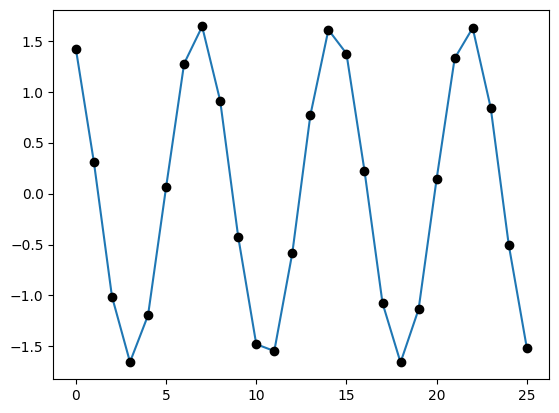

In [90]:
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = np.empty([N,N],float)
for i in range(N):
    if i>0:
        A[i,i-1] = -k
    A[i,i] = alpha
    if i<N-1:
        A[i,i+1] = -k
A[0,0] = alpha - k
A[N-1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

# Solve the equations
x = linsolve_tridiagonal(A,v)

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

Figure 6.1 is reproduced

## Banded systems

In [117]:
import numpy as np

# Solving linear system of banded equations
# This is not the most efficient implementation (we don't need the whole matrix as input)
# but should illusrate the concept
# A0: banded matrix
# v0: Right-hand-side vector
# mright: Number of non-zero elements to the right from main diagonal
# mleft: Number of non-zero elements to the left from main diagonal
def linsolve_banded(A0, v0, mright, mleft):
    # Initialization
    A = A0.copy()
    v = v0.copy()
    N = len(v)
    
    # Gaussian elimination
    for r in range(N):
        # Divide row r by diagonal element
        div = A[r,r]
        if (div == 0.):
            print("Diagonal element is zero! Cannot solve the system with simple Gaussian elimination")
            return None
        for c in range(r,min(r + mright + 1,N)):
            A[r,c] /= div
        v[r] /= div
        
        # Now subtract this row from the lower rows
        # We do not need to go through all the rows
        # but only up to a certain row depending
        # on the number of non-zero elements to right and left of the main diagonal
        max_row = min(r + min(mright,mleft), N - 1)
        
        # First the vector
        for r2 in range(r+1,max_row + 1):
            v[r2] -= A[r2,r] * v[r]
            
        # Then the matrix rows
        for c in range(r + 1,min(r + mright + 1,N)):
            for r2 in range(r+1,max_row + 1):
                A[r2][c] -= A[r2,r] * A[r][c]
  
        # Optional
#         for r2 in range(r+1,max_row + 1):
#             A[r2,r] = 0.
#         print(A)
            
    # Backsubstitution
    x = np.empty(N,float)
    for r in range(N-1,-1,-1):
        x[r] = v[r]
        for c in range(r+1,min(r + mright + 1,N)):
            x[r] -= A[r][c] * x[c]
            
    return x

In [118]:
A = np.array([[ 2,  1,  0,  0 ],
           [ 3,  4, -5,  0 ],
           [ 0, -4,  3,  5 ],
           [ 0,  0,  1,  3 ]],float)

v = np.array([ -4, 3, 9, 7 ],float)
x = linsolve_banded(A, v, 1, 1)
print('x  =', x)
print('Ax =', A.dot(x))
print('v  =', v)

x  = [-2.04  0.08 -1.76  2.92]
Ax = [-4.  3.  9.  7.]
v  = [-4.  3.  9.  7.]


Let us apply it to the springs example from Section 6.1 of M. Newman *Computational Physics*

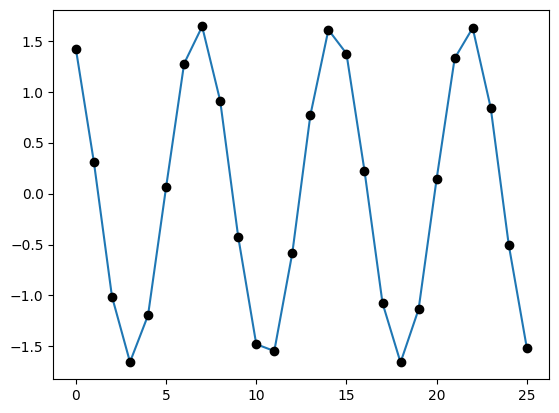

In [119]:
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = np.empty([N,N],float)
for i in range(N):
    if i>0:
        A[i,i-1] = -k
    A[i,i] = alpha
    if i<N-1:
        A[i,i+1] = -k
A[0,0] = alpha - k
A[N-1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

# Solve the equations
x = linsolve_banded(A,v,1,1)

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()